     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
395        324          110                  3  3.5   3.5  9.04         1
396        325          107                  3  3.0   3.5  9.11         1
397        330          116                  4  5.0   4.5  9.45         1
398        312          103                  3  3.5   4.0  8.78         0
399        333          117                  4  5.0   4.0  9.66         1

[400 rows x 7 columns]
0      7
1      5
2      5
3      5
4      4
      ..
395    6
396    6
397    7
398    

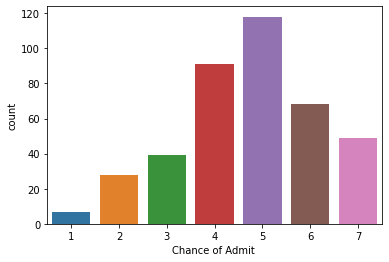

14
Accuracy is: 53.333333333333336
Sensitivity :  nan
Specificity :  1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in long_scalars


In [23]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
data = pd.read_csv('data.csv')
data.head()
data.shape
X = data.iloc[:,:-1]
X.head()
y = data.iloc[:,-1]
y.head()
print(X)
print(y)
data['Chance of Admit '].value_counts()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
sns.countplot(x='Chance of Admit ',data=data)
plt.show()
X_train.shape
X_train.head()
y_test.shape
y_test.head()
from sklearn.metrics import accuracy_score
max_accuracy = 0

from sklearn.neighbors import KNeighborsClassifier


for x in range(1,100):
    model = KNeighborsClassifier(n_neighbors=x)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
print(best_x)

model = KNeighborsClassifier(n_neighbors=best_x)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
filename = 'knn.sav'
pickle.dump(model, open(filename, 'wb'))
acc=(metrics.accuracy_score(y_pred,y_test)*100)
print("Accuracy is:",acc)
cm1 = metrics.confusion_matrix(y_pred,y_test)

total1=sum(sum(cm1))


sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)



In [ ]:
import pickle
import urllib.request
import json
from time import sleep
while True:
  conn = urllib.request.urlopen("https://api.thingspeak.com/channels/1013258/feeds.json?results=1")
  response = conn.read()
  print ("http status code=%s" % (conn.getcode()))
  data=json.loads(response)
  x=int(data['feeds'][0]['entry_id'])
  y=x
  conn.close()
  while x==y:
    conn = urllib.request.urlopen("https://api.thingspeak.com/channels/1013258/feeds.json?results=1")
    response = conn.read()
    #print ("http status code=%s" % (conn.getcode()))
    data=json.loads(response)
    y=int(data['feeds'][0]['entry_id'])
    conn.close()

  conn = urllib.request.urlopen("https://api.thingspeak.com/channels/1013258/feeds.json?results=1")
  response = conn.read()
  print ("http status code=%s" % (conn.getcode()))
  data=json.loads(response)
  a=float(data['feeds'][0]['field1'])
  b=float(data['feeds'][0]['field2'])
  c=float(data['feeds'][0]['field3'])
  d=float(data['feeds'][0]['field4'])
  e=float(data['feeds'][0]['field5'])
  f=float(data['feeds'][0]['field6'])
  g=float(data['feeds'][0]['field7'])

  conn.close()
  filename = 'knn.sav'
  loaded_model = pickle.load(open(filename, 'rb'))
  person_reports = [[a,b,c,d,e,f,g]]
  predicted = loaded_model.predict(person_reports)
  print("ANALYSING....")
  print(predicted[0])
  sleep(15)
  if predicted[0]==1:
      conn = urllib.request.urlopen("https://api.thingspeak.com/update?api_key=QNRWO798ZZV2OEIL&field8=1-VIT<br>2-JPR<br>3-AGNI")
  elif predicted[0]==2:
      conn = urllib.request.urlopen("https://api.thingspeak.com/update?api_key=QNRWO798ZZV2OEIL&field8=1-SREC<br>2-KEC<br>3-KPR")
  elif predicted[0]==3:
      conn = urllib.request.urlopen("https://api.thingspeak.com/update?api_key=QNRWO798ZZV2OEIL&field8=1-KONGU<br>2-KCT<br>3-HIT")
  elif predicted[0]==4:
      conn = urllib.request.urlopen("https://api.thingspeak.com/update?api_key=QNRWO798ZZV2OEIL&field8=1-SASTHRA<br>2-SKCET<br>3-BIT")
  elif predicted[0]==5:
      conn = urllib.request.urlopen("https://api.thingspeak.com/update?api_key=QNRWO798ZZV2OEIL&field8=1-SRM<br>2-THIAGARAJAR<br>3-NIIT")
  elif predicted[0]==6:
      conn = urllib.request.urlopen("https://api.thingspeak.com/update?api_key=QNRWO798ZZV2OEIL&field8=1-PSG<br>2-CIT<br>3-GCT")
  elif predicted[0]==7:
      conn = urllib.request.urlopen("https://api.thingspeak.com/update?api_key=QNRWO798ZZV2OEIL&field8=1-IIT<br>2-MIT<br>3-ANNA_UNIVERSITY-CHE")

http status code=200
http status code=200
ANALYSING....
5


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


http status code=200
